In [133]:
import random
import numpy as np
import math
from sphere_fit import fit_sphere
import matplotlib.pyplot as plt
import math

In [134]:
def generate_sphere_points(noise =0.0):
    #generate random center point (x0, y0, z0) within [0, 500]
    x0 = random.uniform(0, 500)
    y0 = random.uniform(0, 500)
    z0 = random.uniform(0, 500)
    
    # Randomly select a pointer radius r between 20 and 100
    r = random.uniform(20, 100)
    
    # Randomly select an number of measurements n between 4 and 20
    n = random.randint(4, 20)
    
    # Generate n random points on the surface of the sphere
    points = []
    for _ in range(n):
        # Generate random spherical coordinates
        theta = random.uniform(0, 2 * math.pi)       # Angle around the z-axis
        phi = math.acos(random.uniform(0, 1))       # Angle from the z-axis, pointer cannot be below the dimple

        # Convert spherical coordinates to Cartesian coordinates
        x = x0 + r * math.sin(phi) * math.cos(theta) + np.random.normal(0, noise)
        y = y0 + r * math.sin(phi) * math.sin(theta) + np.random.normal(0, noise)
        z = z0 + r * math.cos(phi) + np.random.normal(0, noise)

        points.append((x, y, z))

    return points, r, x0, y0, z0



In [135]:
# Test data generation
points, r, x0, y0, z0 = generate_sphere_points(1)

# Output the results
print(f"Center Point: ({x0:.2f}, {y0:.2f}, {z0:.2f})")
print(f"Radius: {r:.2f}")
print(f"Number of Points: {len(points)}")
print("Points on the Sphere Surface:")
for point in points:
    print(f"({point[0]:.2f}, {point[1]:.2f}, {point[2]:.2f})")


Center Point: (195.63, 386.25, 391.74)
Radius: 97.77
Number of Points: 11
Points on the Sphere Surface:
(155.98, 348.42, 473.44)
(289.75, 361.86, 408.42)
(219.73, 373.76, 487.39)
(116.16, 363.62, 447.87)
(221.18, 344.98, 476.46)
(161.19, 314.97, 450.43)
(211.21, 371.11, 487.10)
(274.45, 368.50, 448.81)
(185.02, 330.78, 472.75)
(232.31, 454.41, 450.43)
(185.67, 436.46, 472.88)


In [136]:
def total_pos_error(center, x0, y0, z0):
    ''' Returns the Euclidean distance between the estimated center and the true center '''
    return np.linalg.norm(center - np.array([x0, y0, z0]))

def total_radius_error(radius, r):
    ''' Returns the absolute difference between the estimated radius and the true radius '''
    return abs(radius - r)

### Visualize the data above

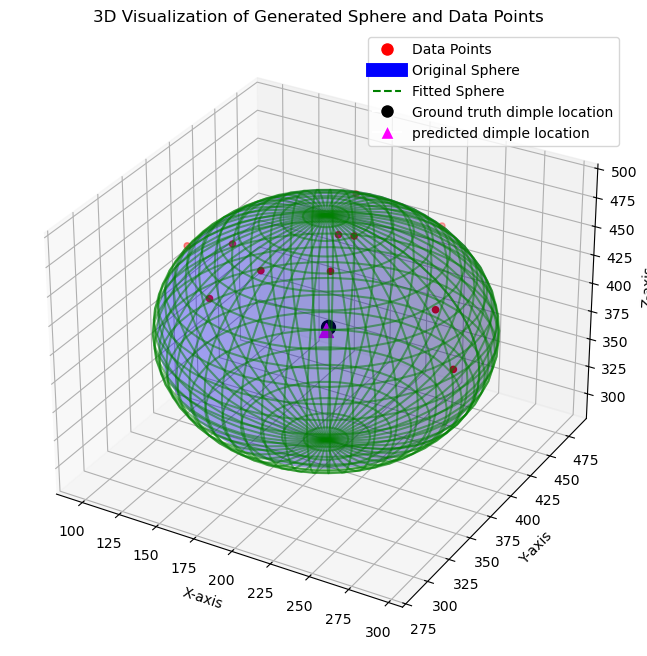

True Center: (195.6306, 386.2458, 391.7444)
True Radius: 97.7687

Estimated Center: (195.4225, 384.7268, 390.5191)
Estimated Radius: 98.9322
Sum of Squared Residuals: 6.8897e+00

Total Position Error: 1.9627
Total Radius Error: 1.1635


In [137]:
# Fit a sphere to the generated points
center, radius, residuals = fit_sphere(points)

# Prepare data for plotting
x_points = [p[0] for p in points]
y_points = [p[1] for p in points]
z_points = [p[2] for p in points]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x_points, y_points, z_points, color='r', label='Measurements')
ax.scatter(x0, y0, z0, color='black', marker='o', s=100, label='Ground truth dimple location')
ax.scatter(center[0], center[1], center[2], color='magenta', marker='^', s=100, label='predicted dimple location')


# Create data for the original sphere surface
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x_sphere = x0 + r * np.cos(u) * np.sin(v)
y_sphere = y0 + r * np.sin(u) * np.sin(v)
z_sphere = z0 + r * np.cos(v)

# Plot the original sphere
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.2, label='Ground Truth')

# Optionally, plot the fitted sphere
x_fit_sphere = center[0] + radius * np.cos(u) * np.sin(v)
y_fit_sphere = center[1] + radius * np.sin(u) * np.sin(v)
z_fit_sphere = center[2] + radius * np.cos(v)
ax.plot_wireframe(x_fit_sphere, y_fit_sphere, z_fit_sphere, color='g', alpha=0.5, label='Fitted Sphere')

# Set plot labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Visualization of Generated Sphere and Data Points')

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data Points',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], linestyle='-', markerfacecolor='b', color='b', label='Original Sphere', linewidth=10),
                   Line2D([0], [0], linestyle='--', color='g', label='Fitted Sphere'),
                   Line2D([0], [0], marker='o', color='w', label='Ground truth dimple location',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='predicted dimple location',
                          markerfacecolor='magenta', markersize=10)]

ax.legend(handles=legend_elements)

# Show the plot
plt.show()

# Print the estimated and true sphere parameters
print(f"True Center: ({x0:.4f}, {y0:.4f}, {z0:.4f})")
print(f"True Radius: {r:.4f}")
print(f"\nEstimated Center: ({center[0]:.4f}, {center[1]:.4f}, {center[2]:.4f})")
print(f"Estimated Radius: {radius:.4f}")
print(f"Sum of Squared Residuals: {residuals:.4e}\n")

print(f"Total Position Error: {total_pos_error(center, x0, y0, z0):.4f}")
print(f"Total Radius Error: {total_radius_error(radius, r):.4f}")

In [138]:
i = 0
avg_p_error = 0
avg_r_error = 0
while(i < 100):
    i += 1
    # Generate test data
    points, r, x0, y0, z0 = generate_sphere_points(random.uniform(0, 5))
    # Print predicted results
    center, radius, residual_sum = fit_sphere(points)

    p_error = total_pos_error(center, x0, y0, z0)
    r_error = total_radius_error(radius, r)

    avg_p_error += p_error
    avg_r_error += r_error

    print("Trial ", i, ":")
    print(f"Total Position Error: {p_error:.4f}")
    print(f"Total Radius Error: {r_error:.4f}\n")
    

print(f"Average Position Error: {avg_p_error/i:.4f}")
print(f"Average Radius Error: {avg_r_error/i:.4f}\n")


Trial  1 :
Total Position Error: 6.0031
Total Radius Error: 2.5043

Trial  2 :
Total Position Error: 2.2419
Total Radius Error: 3.2585

Trial  3 :
Total Position Error: 12.3592
Total Radius Error: 3.2758

Trial  4 :
Total Position Error: 3.0070
Total Radius Error: 0.9484

Trial  5 :
Total Position Error: 4.0037
Total Radius Error: 5.6559

Trial  6 :
Total Position Error: 4.6905
Total Radius Error: 2.3481

Trial  7 :
Total Position Error: 7.1512
Total Radius Error: 5.1875

Trial  8 :
Total Position Error: 2.6452
Total Radius Error: 0.7548

Trial  9 :
Total Position Error: 4.3196
Total Radius Error: 1.4844

Trial  10 :
Total Position Error: 1.3814
Total Radius Error: 1.1111

Trial  11 :
Total Position Error: 0.3636
Total Radius Error: 0.2241

Trial  12 :
Total Position Error: 5.2094
Total Radius Error: 2.2001

Trial  13 :
Total Position Error: 1.4656
Total Radius Error: 0.8005

Trial  14 :
Total Position Error: 38.2639
Total Radius Error: 29.0800

Trial  15 :
Total Position Error: 0.0672